In [283]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     # 画 3D 图的功能

In [237]:
W_real = np.array([1.2, 2.5]).reshape(2,1)

In [238]:
n = 200
X_train = np.ones((n, 2))
X_train[:, 0] = np.linspace(-1, 1, n)


In [239]:
f = lambda W: X_train.dot(W)

In [240]:
y_train.shape, y_real.shape

((200, 1), (200, 1))

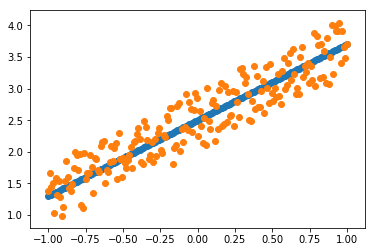

In [241]:
y_real = f(W_real)
y_train = f(W_real) + np.random.rand(n, 1) - 0.5
plt.scatter(X_train[:, 0], y_real)
plt.scatter(X_train[:, 0], y_train)

In [390]:
def loss(W, y_train, f):
    return np.mean((f(W) - y_train)**2)

In [391]:
def gradient(W, f, loss, epsilon = 1e-5):
    
    W_plus, W_minus = W.copy(), W.copy()
    W_plus[0] = W[0] + epsilon
    W_minus[0] = W[0] - epsilon    
    dW = (loss(W_plus, y_train, f) - loss(W_minus, y_train, f))/(2*epsilon)
    
    b_plus, b_minus = W.copy(), W.copy()
    b_plus[1] = W[1] + epsilon
    b_minus[1] = W[1] - epsilon    
    
    db = (loss(b_plus, y_train, f) - loss(b_minus, y_train, f))/(2*epsilon)
    
    return np.hstack((dW, db)).reshape(2,1)

In [392]:
gradient

<function __main__.gradient(W, f, loss, epsilon=1e-05)>

In [393]:
n_iter = 10000
alpha = 0.9
thread = 10e-10
print(W.shape)
gradient(W, f, loss)

(2, 1)


array([[ 8216.9175148 ],
       [68225.95596313]])

In [430]:
W = np.array([[1],[2]])
W_rec = [W]
loss_rec = [0]
dW_rec = []

for ele in range(n_iter):
    dW = gradient(W, f, loss)
    W = W - alpha * dW
    loss_rec.append(loss(W, y_train, f))
    recoder.append(W)
    dW_rec.append(dW)
    
    diff = np.abs(loss_rec[-2] -  loss_rec[-1])

    if diff < thread:
        break
    
W_rec = np.hstack(W_rec).T
dW_rec = np.hstack(dW_rec).T

In [431]:
recoder

[array([[1],
        [2]]), array([[19391.80849756],
        [91567.87174397]]), array([[  7640.47144617],
        [-73249.79526348]]), array([[ 3010.80702509],
        [58604.42417317]]), array([[  1186.84052195],
        [-46879.04578991]]), array([[  468.26599802],
        [37507.7988451 ]]), array([[   185.17492975],
        [-30001.74981899]]), array([[   73.64331449],
        [24005.93953781]]), array([[    29.70873083],
        [-19200.2205307 ]]), array([[1.23977538e+01],
        [1.53647070e+04]]), array([[ 5.57689632e+00],
        [-1.22872345e+04]]), array([[2.88798179e+00],
        [9.83431789e+03]]), array([[ 1.82917978e+00],
        [-7.86292267e+03]]), array([[1.41109045e+00],
        [6.29486917e+03]]), array([[ 1.24680514e+00],
        [-5.03136390e+03]]), array([[1.18226449e+00],
        [4.02962212e+03]]), array([[ 1.15661587e+00],
        [-3.21916651e+03]]), array([[1.14647376e+00],
        [2.57986460e+03]]), array([[ 1.14249236e+00],
        [-2.05936048e+03]]), 

In [432]:
W_recoder.shape

(98, 2)

In [416]:
dW_rec

array([[-2.15453428e+04, -1.01739857e+05],
       [ 1.30570412e+04,  1.83130741e+05],
       [ 5.14407158e+03, -1.46504688e+05],
       [ 2.02662945e+03,  1.17203856e+05],
       [ 7.98416138e+02, -9.37631607e+04],
       [ 3.14545631e+02,  7.50106096e+04],
       [ 1.23924017e+02, -6.00085437e+04],
       [ 4.88162041e+01,  4.80068445e+04],
       [ 1.92344189e+01, -3.84054750e+04],
       [ 7.57873058e+00,  3.07243794e+04],
       [ 2.98768282e+00, -2.45795026e+04],
       [ 1.17644668e+00,  1.96636006e+04],
       [ 4.64543700e-01, -1.57308798e+04],
       [ 1.82539225e-01,  1.25847034e+04],
       [ 7.17118382e-02, -1.00677622e+04],
       [ 2.84984708e-02,  8.05420959e+03],
       [ 1.12690032e-02, -6.44336790e+03],
       [ 4.42378223e-03,  5.15469452e+03],
       [ 1.72294676e-03, -4.12375587e+03],
       [ 6.98491931e-04,  3.29900479e+03],
       [ 2.56113708e-04, -2.63920381e+03],
       [ 9.31322575e-05,  2.11136305e+03],
       [ 5.23868948e-05, -1.68909043e+03],
       [ 1.

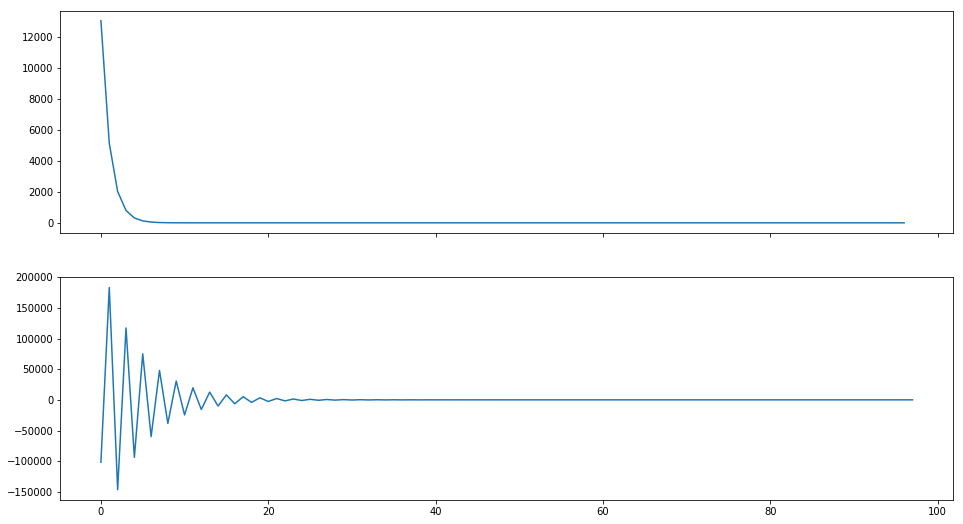

In [449]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=(16,9))
print(axs)
axs[0].plot(range(len(dW_rec[1:])), dW_rec[1:, 0])
# plt.yscale('log')
axs[1].plot(range(dW_rec.shape[0]), dW_rec[:, 1])
# plt.yscale('log')
plt.show()

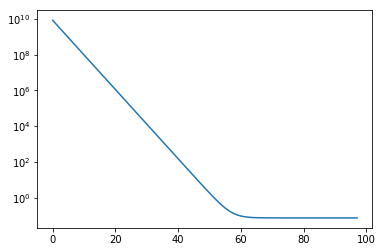

In [450]:
plt.plot(range(len(loss_rec[1:])), loss_rec[1:])
plt.yscale('log')

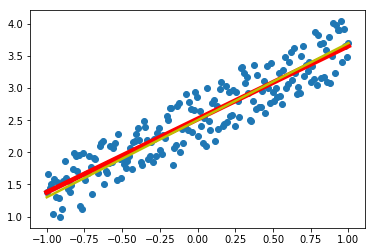

In [451]:
plt.scatter(X_train[:, 0], y_train)
plt.plot(X_train[:, 0], f(W), 'red', lw=5)
plt.plot(X_train[:, 0], y_real, 'y', lw=2.5)

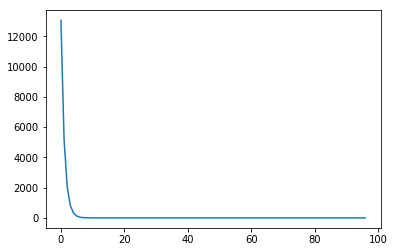

In [452]:
plt.plot(range(len(W_recoder[1:,0])), W_recoder[1:,0], )

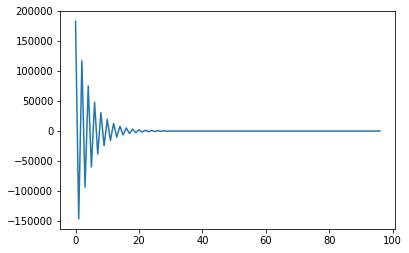

In [453]:
plt.plot(range(len(W_recoder[1:,1])), W_recoder[1:,1], )

In [454]:
X_train.shape, y_real.shape

((200, 2), (200, 1))

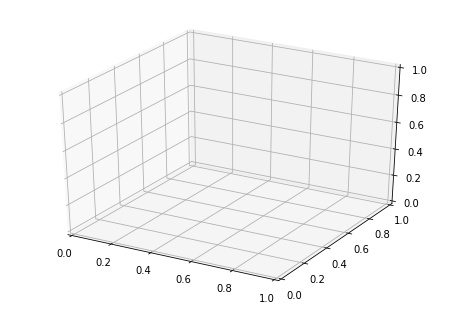

In [456]:
fig = plt.figure(2); ax = Axes3D(fig)
a3D, b3D = np.meshgrid(np.linspace(-5,5,200), np.linspace(-5,5,200))


In [284]:
y = f(x)
plt.scatter(x, y)

ValueError: shapes (200,2) and (200,) not aligned: 2 (dim 1) != 200 (dim 0)

In [ ]:
def gradient()